# Import and Clean Sensor Data

#### Dataset Features:  
Date time year-month-day hour:minute:second  
Temperature, °Celcius  
Humidity, %  
CO&#8322;, (ppm)  
Light (Lux)  
Noise, dB
Bluetooth Devices  
Non-Personal Bluetooth Devices

In [3]:
%matplotlib inline

import numpy as np
import pandas as pd

from datetime import datetime 
import matplotlib.dates as md
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr
import seaborn as sns

sns.set(color_codes=True)

## Data Ingestion

In [4]:
# Read csv file in as a pandas dataframe with a DateTimeIndex
data_file = 'sensor_data.csv'
df = pd.read_csv(data_file, index_col='datetime', parse_dates=True)

In [5]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 37989 entries, 2017-03-25 09:05:58 to 2017-05-13 16:13:20
Data columns (total 9 columns):
location                          37989 non-null object
loc_CO2                           37989 non-null object
temperature                       37989 non-null float64
humidity                          37989 non-null float64
co2                               37989 non-null float64
light                             37989 non-null float64
noise                             37989 non-null float64
bluetooth_devices                 37989 non-null int64
bluetooth_non_personal_devices    29900 non-null float64
dtypes: float64(6), int64(1), object(2)
memory usage: 2.9+ MB


,location,loc_CO2,temperature,humidity,co2,light,noise,bluetooth_devices,bluetooth_non_personal_devices
datetime,,,,,,,,,
2017-03-25 09:05:58,Georgetown-default,Georgetown-manual,22.6,36.9,781.0,430.0,511.0,1,NaN
2017-03-25 09:06:04,Georgetown-default,Georgetown-manual,23.8,39.0,767.0,448.0,510.0,8,NaN
2017-03-25 09:06:10,Georgetown-default,Georgetown-manual,23.8,39.0,754.0,423.0,511.0,8,NaN
2017-03-25 09:06:15,Georgetown-default,Georgetown-manual,23.8,39.0,768.0,412.0,492.0,8,NaN
2017-03-25 09:06:21,Georgetown-default,Georgetown-manual,23.8,39.0,758.0,428.0,491.0,9,NaN


In [4]:
# Use Groupby to see which days are captured in the data: by_day
by_day = df.groupby(df.index.strftime('%D')).count()
print(by_day)

          location  loc_CO2  temperature  humidity   co2  light  noise  \
03/25/17      3712     3712         3712      3712  3712   3712   3712   
04/01/17      4377     4377         4377      4377  4377   4377   4377   
04/08/17      4575     4575         4575      4575  4575   4575   4575   
04/22/17      5298     5298         5298      5298  5298   5298   5298   
04/29/17      5039     5039         5039      5039  5039   5039   5039   
05/05/17      2390     2390         2390      2390  2390   2390   2390   
05/06/17      5320     5320         5320      5320  5320   5320   5320   
05/12/17      2083     2083         2083      2083  2083   2083   2083   
05/13/17      5195     5195         5195      5195  5195   5195   5195   

          bluetooth_devices  bluetooth_non_personal_devices  
03/25/17               3712                               0  
04/01/17               4377                               0  
04/08/17               4575                            4575  
04/22/17   

In [6]:
# Delete location columns
df.drop(df.columns[[0, 1]], axis=1, inplace=True)

### Data Wrangling: Temperature Data
For Reference: The temperature sensor has a range of -40 to 125°C. OSHA recommends temperature control in the range of 20-24.4°C (68-76°F). 

In [7]:
# Create temperature dataframe with DateTimeIndex
temperature_data = df[['temperature']].copy()
temperature_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 37989 entries, 2017-03-25 09:05:58 to 2017-05-13 16:13:20
Data columns (total 1 columns):
temperature    37989 non-null float64
dtypes: float64(1)
memory usage: 593.6 KB


In [5]:
# Summary statistics for temperature data
temperature_data.describe()

,temperature
count,37989.000000
mean,23.024386
std,7.552849
min,-999.000000
25%,22.300000
50%,22.900000
75%,23.200000
max,29.400000


The minimum value of -999 is an obvious error from the temperature sensor. Even Neptune, the coldest planet in our solar system (sorry Pluto!), has an average temperature of -214°C.

In [8]:
# Delete two -999 values
temperature_data = temperature_data[temperature_data['temperature'] != -999]

In [9]:
# Updated temperature statistics
temperature_data.describe()

,temperature
count,37987.000000
mean,23.078195
std,1.431749
min,20.700000
25%,22.300000
50%,22.900000
75%,23.200000
max,29.400000


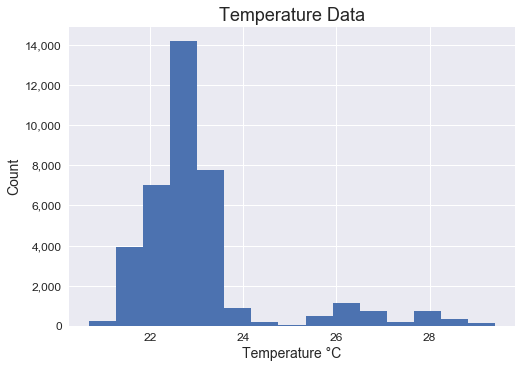

In [10]:
# Histogram of humidity data
fig = plt.figure()
ax = fig.add_subplot(111)

ax.hist(temperature_data['temperature'], bins=15, range=(temperature_data['temperature'].min(),
                                                         temperature_data['temperature'].max()))
plt.title('Temperature Data', size=18)
plt.xlabel('Temperature °C', size=14)
plt.ylabel('Count', size=14)
plt.tick_params(labelsize=12)
ax.yaxis.set_major_formatter(tkr.FuncFormatter(lambda y,  p: format(int(y), ',')))

C:\Users\kautu\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


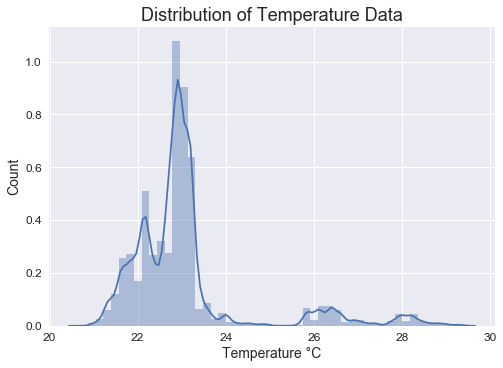

In [11]:
# Distribution of temperature data

sns.distplot(temperature_data['temperature'])

plt.title('Distribution of Temperature Data', size=18)
plt.xlabel('Temperature °C', size=14)
plt.ylabel('Count', size=14)
plt.tick_params(labelsize=12)

In [21]:
# Create temperature dataframe with a daily PeriodIndex
temp_period = temperature_data.to_period(freq='D')

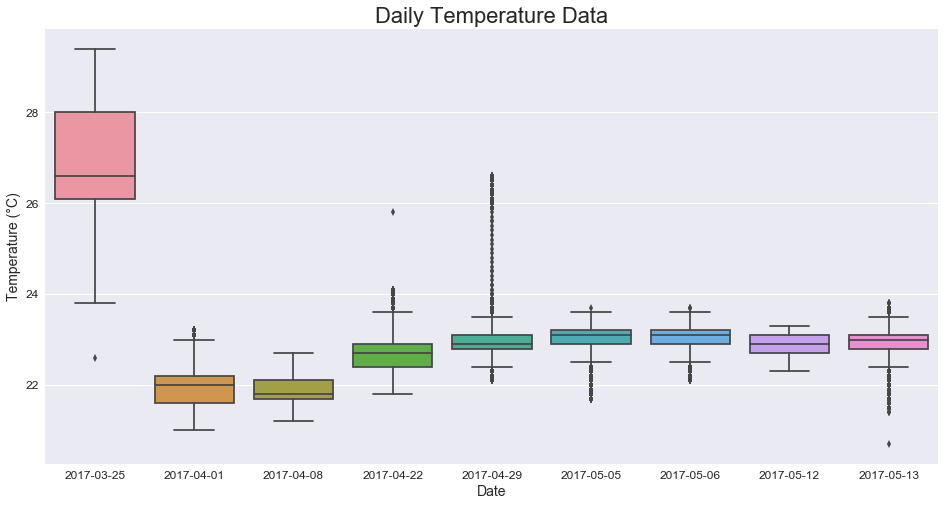

In [22]:
# Box-and-whisker plots for daily temperature data
fig, ax = plt.subplots(figsize=(16,8))

sns.boxplot(x=temp_period.index, y='temperature', data=temp_period, ax=ax)
ax.set_title('Daily Temperature Data',fontsize= 22) 
ax.set_xlabel('Date', fontsize=14)
plt.tick_params(labelsize=12)
ax.set_ylabel('Temperature (°C)', fontsize=14)

The boxplots show single outliers for certain days, such as for March 25, April 22 and May 13. Further investigation found that these values are from the initial sensor reading of that particular day (please see below). While the difference between the first reading and the following values may not seem as significant at first, the dataframe's standard deviation is only 1.4, so its important to address them. Since the values are relatively close, we will backward fill those days. 

In [23]:
# Look at the first values from each day
temp_3_25 = temperature_data['temperature'].loc['2017-03-25']
temp_3_25.head()

datetime
2017-03-25 09:05:58    22.6
2017-03-25 09:06:04    23.8
2017-03-25 09:06:10    23.8
2017-03-25 09:06:15    23.8
2017-03-25 09:06:21    23.8
Name: temperature, dtype: float64

In [24]:
temp_5_13 = temperature_data['temperature'].loc['2017-05-13']
temp_5_13.head()

datetime
2017-05-13 08:57:13    20.7
2017-05-13 08:57:18    21.4
2017-05-13 08:57:23    21.4
2017-05-13 08:57:28    21.4
2017-05-13 08:57:33    21.5
Name: temperature, dtype: float64

In [25]:
# TO DO: Backward fill the first value of March 25, April 22 and 29, and May 5, 6 and 13

In [ ]:
# Updated summary statistics
temperature_data.describe()

### Data Wrangling: Humidity

For Reference: The sensor has a range of 0-100% relative humidity (RH). OSHA recommends humidity control in the range of 20%-60%.

In [13]:
# Create humidity dataframe with DateTimeIndex
humidity_data = df[['humidity']].copy()

In [29]:
humidity_data.info()
humidity_data.describe()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 37989 entries, 2017-03-25 09:05:58 to 2017-05-13 16:13:20
Data columns (total 1 columns):
humidity    37989 non-null float64
dtypes: float64(1)
memory usage: 593.6 KB


,humidity
count,37989.000000
mean,39.592474
std,10.426067
min,-999.000000
25%,37.500000
50%,39.700000
75%,45.600000
max,52.200000


In [14]:
# Delete two -999 values
humidity_data = humidity_data[humidity_data['humidity'] != -999]

In [31]:
# Updated humidity statistics
humidity_data.describe()

,humidity
count,37987.000000
mean,39.647156
std,7.205023
min,20.800000
25%,37.500000
50%,39.700000
75%,45.600000
max,52.200000


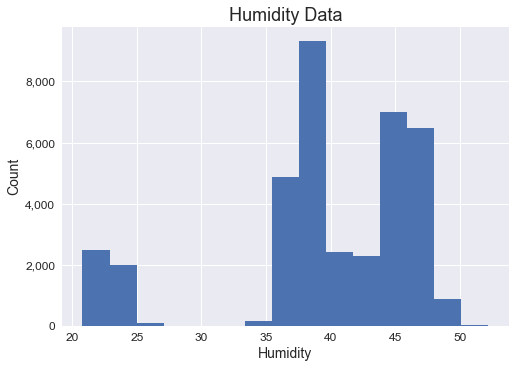

In [15]:
# Histogram of humidity data
fig = plt.figure()
ax = fig.add_subplot(111)

ax.hist(humidity_data['humidity'], bins = 15, range = (humidity_data['humidity'].min(),
                                                       humidity_data['humidity'].max()))
plt.title('Humidity Data', size=18)
plt.xlabel('Humidity', size=14)
plt.ylabel('Count', size=14)
plt.tick_params(labelsize=12)
ax.yaxis.set_major_formatter(tkr.FuncFormatter(lambda y,  p: format(int(y), ',')))

C:\Users\kautu\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


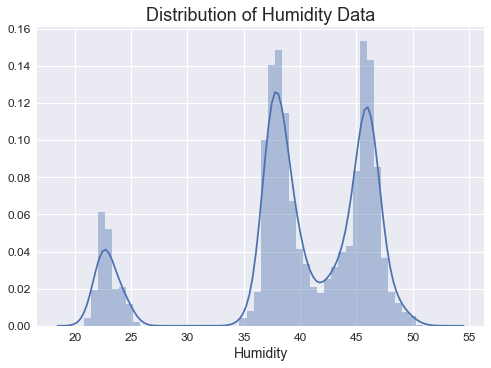

In [16]:
# Distribution of humidity data

sns.distplot(humidity_data['humidity'])

plt.title('Distribution of Humidity Data', size=18)
plt.xlabel('Humidity', size=14)
plt.tick_params(labelsize=12)

In [34]:
# Create humidity dataframe with a daily PeriodIndex
humidity_period = humidity_data.to_period(freq='D')
humidity_period.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 37987 entries, 2017-03-25 to 2017-05-13
Freq: D
Data columns (total 1 columns):
humidity    37987 non-null float64
dtypes: float64(1)
memory usage: 593.5 KB


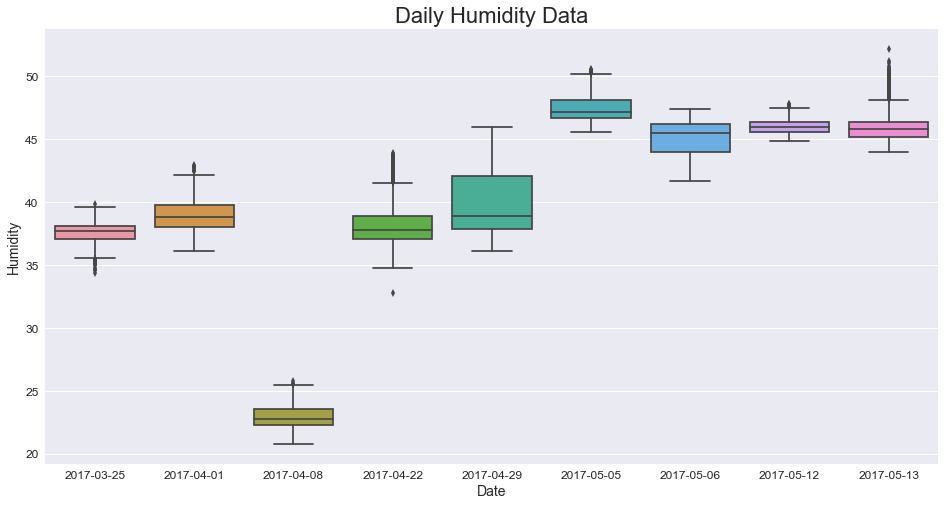

In [35]:
# Box-and-whisker plots for daily humidity data
fig, ax = plt.subplots(figsize=(16,8))

sns.boxplot(x=humidity_period.index, y='humidity', data=humidity_period, ax=ax)
ax.set_title('Daily Humidity Data',fontsize= 22) 
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Humidity', fontsize=14)
plt.tick_params(labelsize=12)

TO DO: Look into why the data April 8 differs so greatly from the others. 

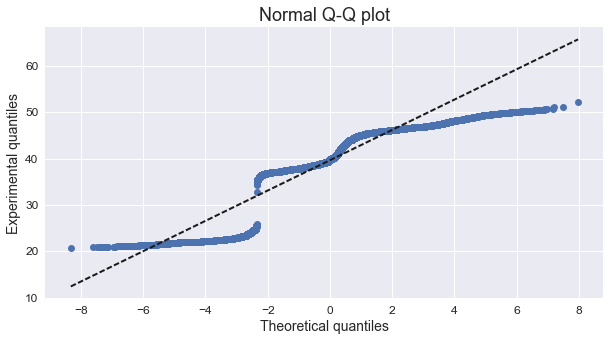

In [17]:
# Determine whether humidity data is normally distributed
humidity_distribution = humidity_data.values.flatten()
humidity_distribution.sort()
norm = np.random.normal(0,2,len(humidity_distribution))
norm.sort()

plt.figure(figsize=(10,5),facecolor='1.0') 
plt.plot(norm, humidity_distribution,'o')

# Generate a trend line
z = np.polyfit(norm, humidity_distribution, 1)
p = np.poly1d(z)
plt.plot(norm,p(norm),'k--', linewidth=2)
plt.title('Normal Q-Q plot', size=18)
plt.xlabel('Theoretical quantiles', size=14)
plt.ylabel('Experimental quantiles', size=14)
plt.tick_params(labelsize=12)

### Data Wrangling: CO&#8322; Data
For Reference: The CO&#8322; sensor has a range of 0-2000 parts per million (ppm).

In [18]:
# Create CO2 dataframe with DateTimeIndex
co2_data = df[['co2']].copy()

In [19]:
co2_data.info()
co2_data.describe()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 37989 entries, 2017-03-25 09:05:58 to 2017-05-13 16:13:20
Data columns (total 1 columns):
co2    37989 non-null float64
dtypes: float64(1)
memory usage: 593.6 KB


,co2
count,37989.000000
mean,1192.690779
std,162.518301
min,2.000000
25%,1083.000000
50%,1230.000000
75%,1301.000000
max,2001.000000


#### CO&#8322; Error Values
The summary statistics report a mean of 1192.69 and a standard deviation of 162.51. However, the 25% quartile has a range of 2 to 1083.

In [39]:
# Identify how many 2 values are in the data
co2_errors = co2_data[co2_data['co2'] == 2]
co2_errors['co2'].head()

datetime
2017-04-08 08:58:39    2.0
2017-04-08 09:09:13    2.0
2017-04-08 09:11:05    2.0
2017-04-08 09:11:35    2.0
2017-04-08 09:29:44    2.0
Name: co2, dtype: float64

In [20]:
# Delete 2 values
co2_data = co2_data[co2_data['co2'] != 2]

In [41]:
# Check updated CO2 statistics
co2_data.describe()

,co2
count,37960.000000
mean,1193.600421
std,159.211863
min,629.000000
25%,1083.000000
50%,1230.000000
75%,1301.000000
max,2001.000000


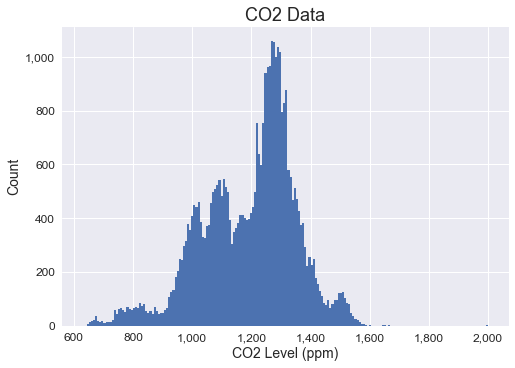

In [95]:
# Histogram of CO2 data
n_data = len(co2_data.co2)
n_bins = np.sqrt(n_data)
n_bins = int(n_bins)

fig = plt.figure()
ax = fig.add_subplot(111)

ax.hist(co2_data['co2'], bins=n_bins, range = (co2_data['co2'].min(),co2_data['co2'].max()))
plt.title('CO2 Data', size=18)
plt.xlabel('CO2 Level (ppm)', size=14)
plt.ylabel('Count', size=14)
plt.tick_params(labelsize=12)
ax.xaxis.set_major_formatter(tkr.FuncFormatter(lambda x,  p: format(int(x), ',')))
ax.yaxis.set_major_formatter(tkr.FuncFormatter(lambda y,  p: format(int(y), ',')))

C:\Users\kautu\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


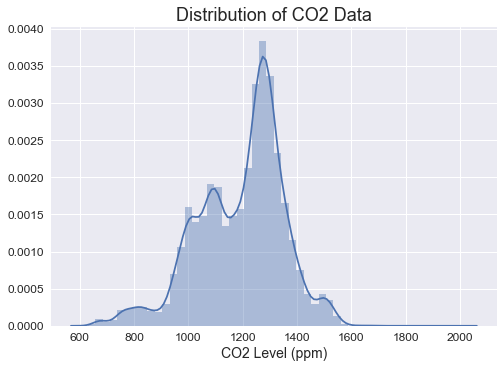

In [96]:
# Distribution of CO2 data
sns.distplot(co2_data['co2'])

plt.title('Distribution of CO2 Data', size=18)
plt.xlabel('CO2 Level (ppm)', size=14)
plt.tick_params(labelsize=12)

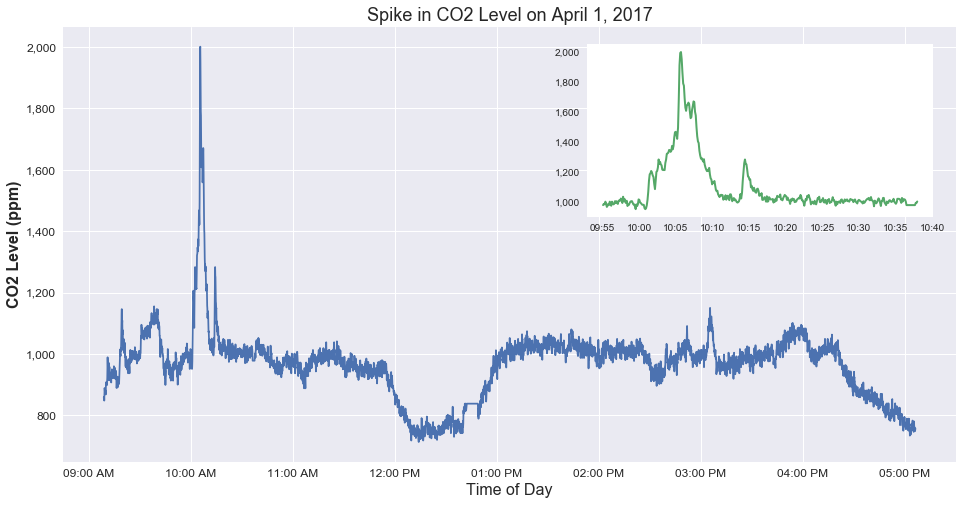

In [44]:
# Plot spike in CO2 level on April 1, 2017
fig, ax = plt.subplots(figsize=(16,8))

ax.plot(co2_data.loc['April 1, 2017'])
ax.set_title('Spike in CO2 Level on April 1, 2017', fontsize=18)
ax.set_ylabel('CO2 Level (ppm)', fontsize=16, weight='bold')
ax.set_xlabel('Time of Day', fontsize=16)
plt.tick_params(labelsize=12)
ax.xaxis.set_major_formatter(md.DateFormatter('%I:%M %p'))
ax.yaxis.set_major_formatter(tkr.FuncFormatter(lambda y,  p: format(int(y), ',')))

ax = plt.axes([.58, .55, .3, .3], facecolor='w')
ax.plot(co2_data['co2'].loc['2017-04-01 09:55:00':'2017-04-01 10:38:00'].index, 
        co2_data['co2'].loc['2017-04-01 09:55:00':'2017-04-01 10:38:00'], 
        'g', linewidth=2.0)
ax.xaxis.set_major_formatter(md.DateFormatter('%I:%M'))
ax.yaxis.set_major_formatter(tkr.FuncFormatter(lambda y,  p: format(int(y), ',')))

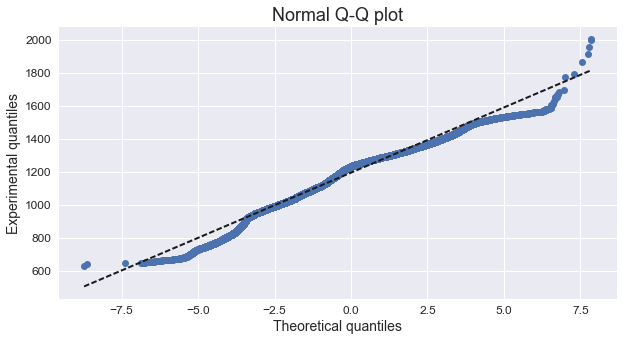

In [45]:
# Determine whether CO2 data is normally distributed
co2_distribution = co2_data.values.flatten()
co2_distribution.sort()
norm = np.random.normal(0,2,len(co2_distribution))
norm.sort()

plt.figure(figsize=(10,5),facecolor='1.0') 
plt.plot(norm, co2_distribution,'o')

# Generate a trend line
z = np.polyfit(norm, co2_distribution, 1)
p = np.poly1d(z)
plt.plot(norm,p(norm),'k--', linewidth=2)
plt.title('Normal Q-Q plot', size=18)
plt.xlabel('Theoretical quantiles', size=14)
plt.ylabel('Experimental quantiles', size=14)
plt.tick_params(labelsize=12)

In [21]:
# Create CO2 dataframe with a daily PeriodIndex
co2_period = co2_data.to_period(freq='D')
co2_period.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 37960 entries, 2017-03-25 to 2017-05-13
Freq: D
Data columns (total 1 columns):
co2    37960 non-null float64
dtypes: float64(1)
memory usage: 593.1 KB


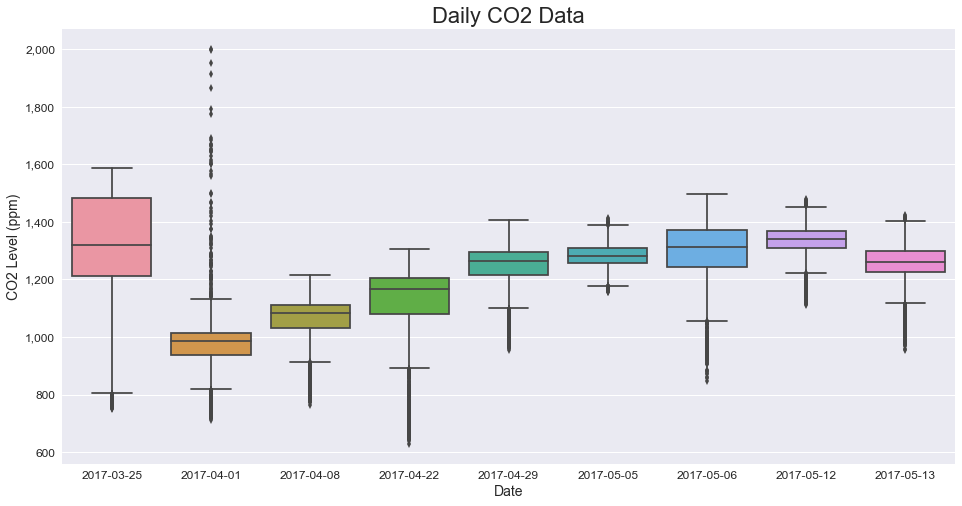

In [22]:
# Box-and-whisker plots of daily CO2 data
fig, ax = plt.subplots(figsize=(16,8))
sns.boxplot(x=co2_period.index, y='co2', data=co2_period, ax=ax)

ax.set_title('Daily CO2 Data', fontsize=22) 
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('CO2 Level (ppm)', fontsize=14)
plt.tick_params(labelsize=12)
ax.yaxis.set_major_formatter(tkr.FuncFormatter(lambda y,  p: format(int(y), ',')))

### Data Wrangling: Noise Data

In [23]:
# Create noise dataframe with DateTimeIndex
noise_data = df[['noise']].copy()

In [49]:
noise_data.info()
noise_data.describe()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 37989 entries, 2017-03-25 09:05:58 to 2017-05-13 16:13:20
Data columns (total 1 columns):
noise    37989 non-null float64
dtypes: float64(1)
memory usage: 593.6 KB


,noise
count,37989.000000
mean,315.193977
std,177.548181
min,0.000000
25%,144.000000
50%,216.000000
75%,502.000000
max,1023.000000


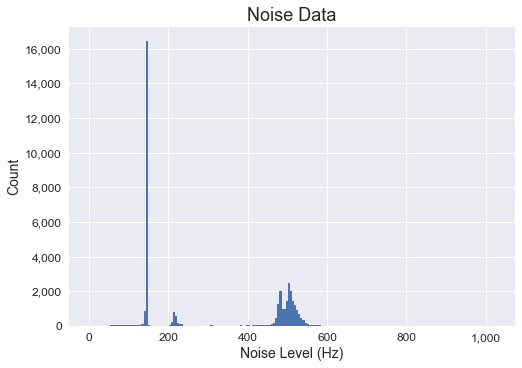

In [24]:
# Histogram of noise data
n_data = len(noise_data.noise)
n_bins = np.sqrt(n_data)
n_bins = int(n_bins)

fig = plt.figure()
ax = fig.add_subplot(111)

ax.hist(noise_data['noise'], bins=n_bins, range = (noise_data['noise'].min(), noise_data['noise'].max()))
plt.title('Noise Data', size=18)
plt.xlabel('Noise Level (Hz)', size=14)
plt.ylabel('Count', size=14)
plt.tick_params(labelsize=12)
ax.xaxis.set_major_formatter(tkr.FuncFormatter(lambda x,  p: format(int(x), ',')))
ax.yaxis.set_major_formatter(tkr.FuncFormatter(lambda y,  p: format(int(y), ',')))

C:\Users\kautu\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


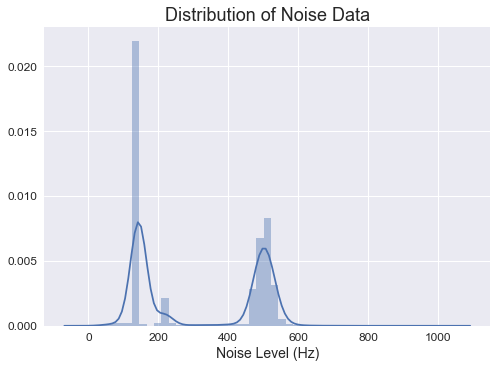

In [25]:
# Distribution of noise of data
sns.distplot(noise_data['noise'])

plt.title('Distribution of Noise Data', size=18)
plt.xlabel('Noise Level (Hz)', size=14)
plt.tick_params(labelsize=12)

In [52]:
# Create noise dataframe with a daily PeriodIndex
noise_period = noise_data.to_period(freq='D')
noise_period.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 37989 entries, 2017-03-25 to 2017-05-13
Freq: D
Data columns (total 1 columns):
noise    37989 non-null float64
dtypes: float64(1)
memory usage: 593.6 KB


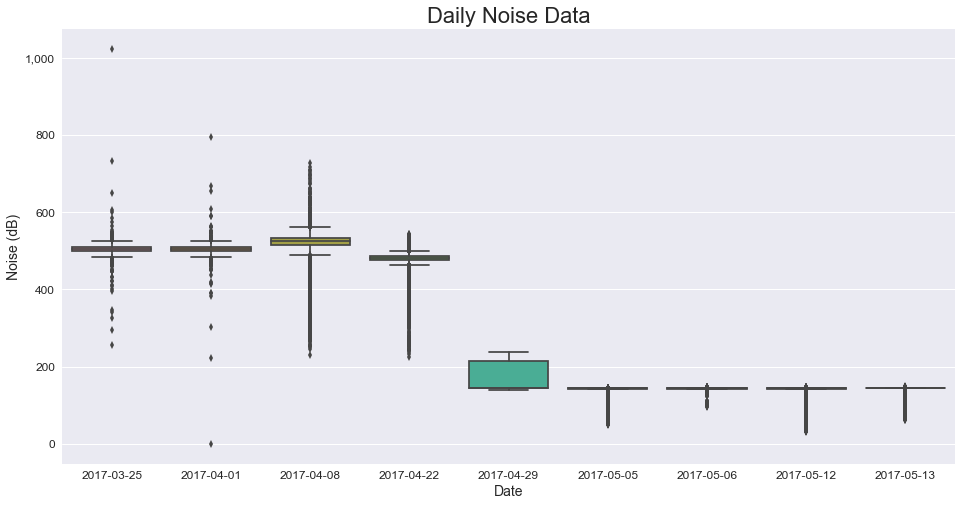

In [53]:
# Box-and-whisker plots of daily noise data
fig, ax = plt.subplots(figsize=(16,8))

sns.boxplot(x=noise_period.index, y='noise', data=noise_period, ax=ax)
ax.set_title('Daily Noise Data',fontsize= 22) 
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Noise (dB)', fontsize=14)
plt.tick_params(labelsize=12)
ax.yaxis.set_major_formatter(tkr.FuncFormatter(lambda y,  p: format(int(y), ',')))

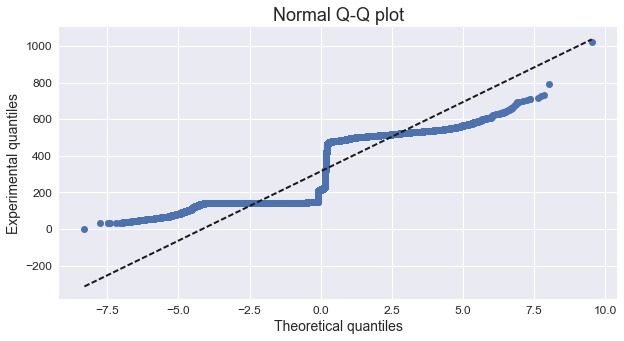

In [54]:
# Determine whether noise data is normally distributed
noise_distribution = noise_data.values.flatten()
noise_distribution.sort()
norm = np.random.normal(0,2,len(noise_distribution))
norm.sort()

plt.figure(figsize=(10,5),facecolor='1.0') 
plt.plot(norm, noise_distribution,'o')

# Generate a trend line
z = np.polyfit(norm, noise_distribution, 1)
p = np.poly1d(z)
plt.plot(norm,p(norm),'k--', linewidth=2)
plt.title('Normal Q-Q plot', size=18)
plt.xlabel('Theoretical quantiles', size=14)
plt.ylabel('Experimental quantiles', size=14)
plt.tick_params(labelsize=12)

### Data Wrangling: Light Data
For Reference: The sensor has a light resistance of 10 Lux (30 to 50 kohm).

In [26]:
# Create light dataframe with DateTimeIndex
light_data = df[['light']].copy()

In [27]:
light_data.info()
light_data.describe()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 37989 entries, 2017-03-25 09:05:58 to 2017-05-13 16:13:20
Data columns (total 1 columns):
light    37989 non-null float64
dtypes: float64(1)
memory usage: 593.6 KB


,light
count,3.798900e+04
mean,3.057904e+03
std,1.520886e+05
min,0.000000e+00
25%,1.810000e+02
50%,2.210000e+02
75%,4.530000e+02
max,1.000000e+07


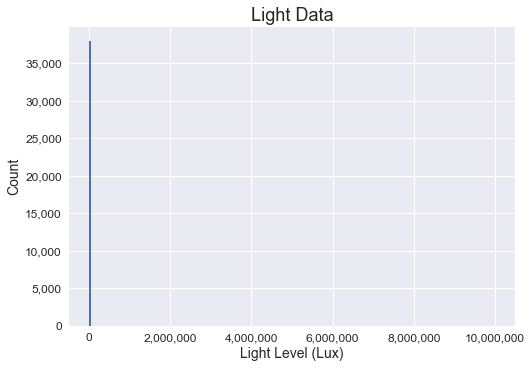

In [28]:
# Histogram of light data
n_data = len(light_data.light)
n_bins = np.sqrt(n_data)
n_bins = int(n_bins)

fig = plt.figure()
ax = fig.add_subplot(111)

ax.hist(light_data['light'], bins=n_bins, range = (light_data['light'].min(), light_data['light'].max()))
plt.title('Light Data', size=18)
plt.xlabel('Light Level (Lux)', size=14)
plt.ylabel('Count', size=14)
plt.tick_params(labelsize=12)
ax.xaxis.set_major_formatter(tkr.FuncFormatter(lambda x,  p: format(int(x), ',')))
ax.yaxis.set_major_formatter(tkr.FuncFormatter(lambda y,  p: format(int(y), ',')))

From the histogram, it is clear that there are outliers in the dataset. 

In [58]:
# Identify the high error values
light_max = light_data[light_data['light'] > 4500]
light_max['light']

datetime
2017-04-08 14:02:54    9306527.000
2017-04-22 11:56:44    7718174.000
2017-04-22 12:53:51    8308485.000
2017-04-22 14:10:58    8016883.000
2017-04-29 12:23:45    9999999.999
2017-04-29 14:33:24    9999999.999
2017-04-29 15:57:55    9999999.999
2017-05-06 11:13:38    8009105.000
2017-05-12 18:26:26    8707175.000
2017-05-12 20:46:56    8725352.000
2017-05-13 09:02:19    9135322.000
Name: light, dtype: float64

In [29]:
# Delete error light values
light_data = light_data[light_data['light'] < 4500]

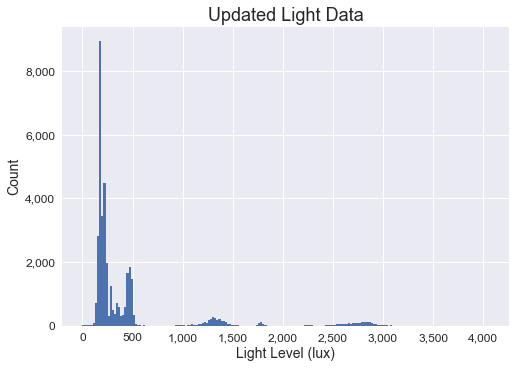

In [30]:
# Updated histogram of light data
n_data = len(light_data.light)
n_bins = np.sqrt(n_data)
n_bins = int(n_bins)

fig = plt.figure()
ax = fig.add_subplot(111)

ax.hist(light_data['light'], bins=n_bins, range = (light_data['light'].min(), light_data['light'].max()))
plt.title('Updated Light Data', size=18)
plt.xlabel('Light Level (lux)', size=14)
plt.ylabel('Count', size=14)
plt.tick_params(labelsize=12)
ax.xaxis.set_major_formatter(tkr.FuncFormatter(lambda x,  p: format(int(x), ',')))
ax.yaxis.set_major_formatter(tkr.FuncFormatter(lambda y,  p: format(int(y), ',')))

C:\Users\kautu\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


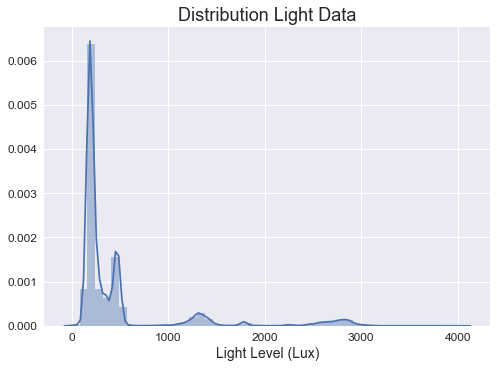

In [31]:
# Distribution of light data

sns.distplot(light_data['light'])

plt.title('Distribution Light Data', size=18)
plt.xlabel('Light Level (Lux)', size=14)
plt.tick_params(labelsize=12)

In [62]:
# Create light dataframe with a daily PeriodIndex
light_period = light_data.to_period(freq='D')
light_period.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 37978 entries, 2017-03-25 to 2017-05-13
Freq: D
Data columns (total 1 columns):
light    37978 non-null float64
dtypes: float64(1)
memory usage: 593.4 KB


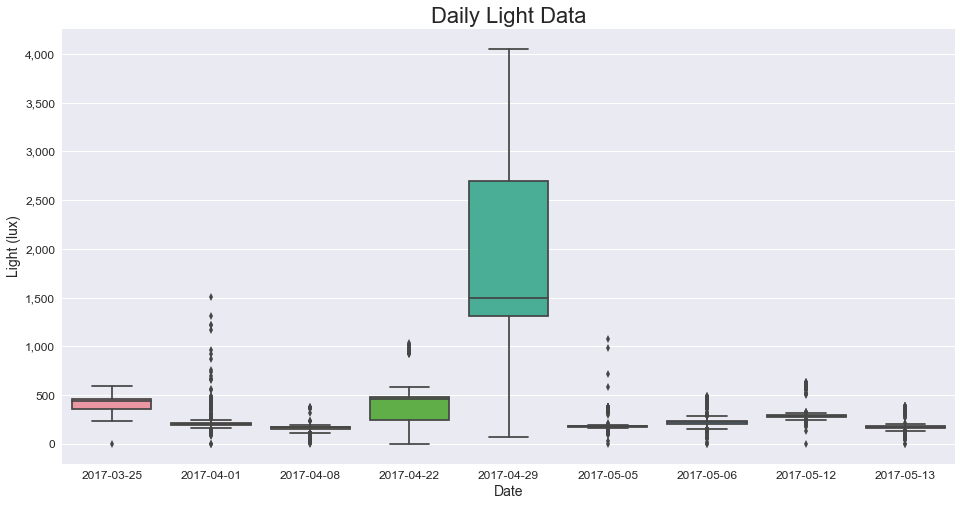

In [63]:
# Box-and-whiskers plots of daily light data
fig, ax = plt.subplots(figsize=(16,8))

sns.boxplot(x=light_period.index, y='light', data=light_period)
ax.set_title('Daily Light Data', fontsize=22)
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Light (lux)', fontsize=14)
plt.tick_params(labelsize=12)
ax.yaxis.set_major_formatter(tkr.FuncFormatter(lambda y,  p: format(int(y), ',')))

TO DO: Look into the source of the outliers

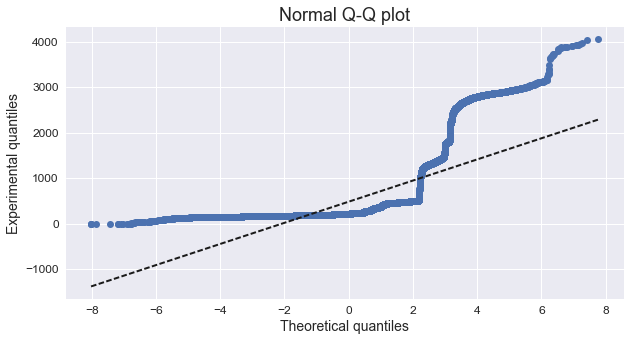

In [64]:
# Determine whether light data is normally distributed
light_distribution = light_data.values.flatten()
light_distribution.sort()
norm = np.random.normal(0,2,len(light_distribution))
norm.sort()

plt.figure(figsize=(10,5),facecolor='1.0') 
plt.plot(norm, light_distribution,'o')

# Generate a trend line
z = np.polyfit(norm, light_distribution, 1)
p = np.poly1d(z)
plt.plot(norm,p(norm),'k--', linewidth=2)
plt.title('Normal Q-Q plot', size=18)
plt.xlabel('Theoretical quantiles', size=14)
plt.ylabel('Experimental quantiles', size=14)
plt.tick_params(labelsize=12)

### Data Wrangling: Bluetooth Devices

In [32]:
# Create bluetooth devices dataframe with DateTimeIndex
bluetooth_data = df[['bluetooth_devices']].copy()

In [33]:
bluetooth_data.info()
bluetooth_data.describe()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 37989 entries, 2017-03-25 09:05:58 to 2017-05-13 16:13:20
Data columns (total 1 columns):
bluetooth_devices    37989 non-null int64
dtypes: int64(1)
memory usage: 593.6 KB


,bluetooth_devices
count,37989.000000
mean,237.194451
std,147.937111
min,0.000000
25%,122.000000
50%,198.000000
75%,345.000000
max,635.000000


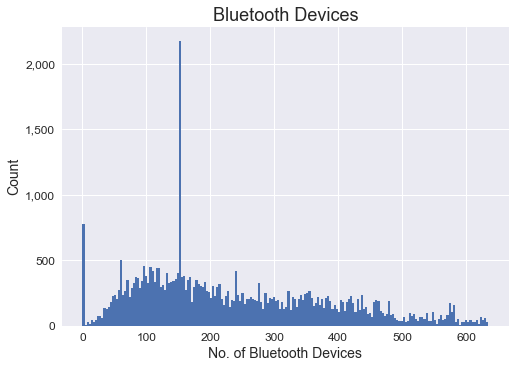

In [34]:
# Histogram of bluetooth data
n_data = len(bluetooth_data.bluetooth_devices)
n_bins = np.sqrt(n_data)
n_bins = int(n_bins)

fig = plt.figure()
ax = fig.add_subplot(111)

ax.hist(bluetooth_data['bluetooth_devices'], bins=n_bins, range = (bluetooth_data['bluetooth_devices'].min(),
                                                                   bluetooth_data['bluetooth_devices'].max()))
plt.title('Bluetooth Devices', size=18)
plt.xlabel('No. of Bluetooth Devices', size=14)
plt.ylabel('Count', size=14)
plt.tick_params(labelsize=12)
ax.yaxis.set_major_formatter(tkr.FuncFormatter(lambda y,  p: format(int(y), ',')))

C:\Users\kautu\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


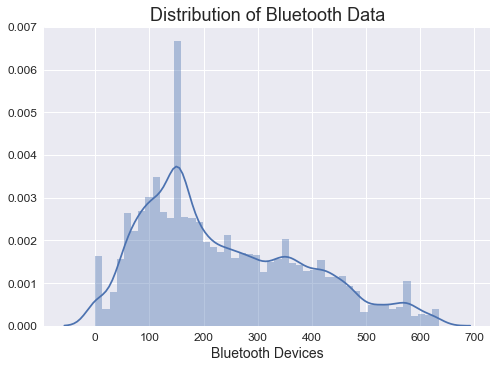

In [35]:
# Distribution of bluetooth data
sns.distplot(bluetooth_data['bluetooth_devices'])

plt.title('Distribution of Bluetooth Data', size=18)
plt.xlabel('Bluetooth Devices', size=14)
plt.tick_params(labelsize=12)

In [69]:
# Identify the high number of 0 values
bluetooth_zeros = bluetooth_data[bluetooth_data['bluetooth_devices'] == 0]
bluetooth_zeros['bluetooth_devices'].head(10)

datetime
2017-03-25 10:33:02    0
2017-03-25 10:33:08    0
2017-03-25 10:33:13    0
2017-04-01 12:48:35    0
2017-04-08 09:00:59    0
2017-04-08 09:32:52    0
2017-04-22 08:35:29    0
2017-04-29 08:57:06    0
2017-04-29 08:57:11    0
2017-04-29 08:57:16    0
Name: bluetooth_devices, dtype: int64

TO DO: Research 0 values to see if they are from sensor error

In [36]:
# Create bluetooth dataframe with a daily PeriodIndex
bluetooth_period = bluetooth_data.to_period(freq='D')
bluetooth_period.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 37989 entries, 2017-03-25 to 2017-05-13
Freq: D
Data columns (total 1 columns):
bluetooth_devices    37989 non-null int64
dtypes: int64(1)
memory usage: 593.6 KB


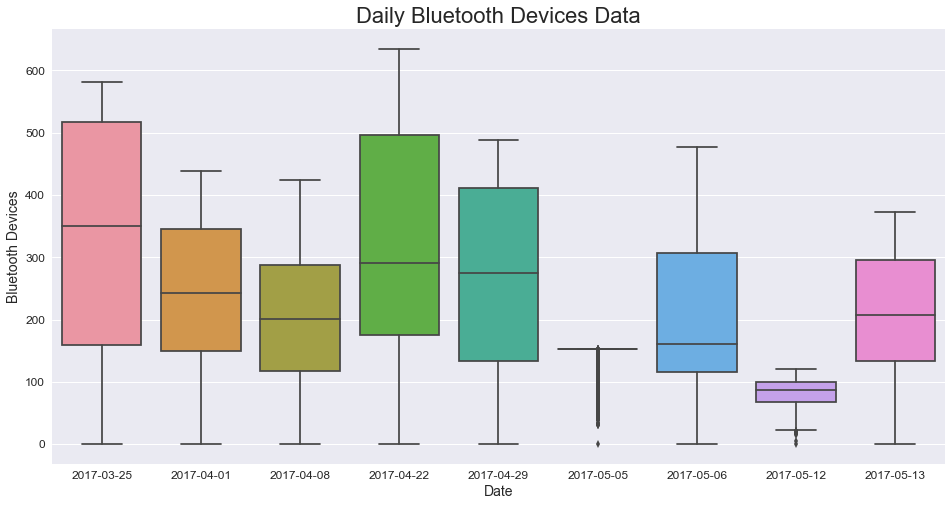

In [71]:
# Box-and-whiskers plots of daily bluetooth data

fig, ax = plt.subplots(figsize=(16,8))
sns.boxplot(x=bluetooth_period.index, y='bluetooth_devices', data=bluetooth_period, ax=ax)

ax.set_title('Daily Bluetooth Devices Data', fontsize=22)
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Bluetooth Devices', fontsize=14)
plt.tick_params(labelsize=12)

In [72]:
# Look at summary statistics to see why May 5 data varies so greatly from the other days
bluetooth_data.loc['May 5, 2017'].describe()

,bluetooth_devices
count,2390.000000
mean,143.457322
std,24.036156
min,0.000000
25%,153.000000
50%,153.000000
75%,153.000000
max,153.000000


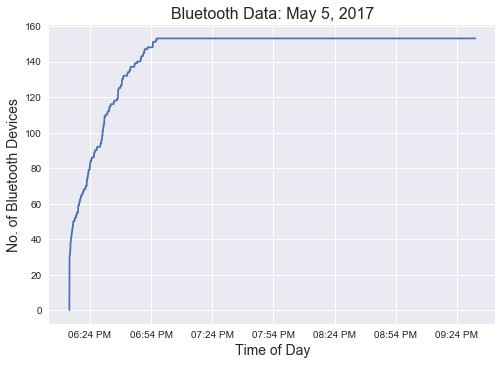

In [73]:
# Plot bluetooth data for May 5, 2017
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(bluetooth_data.loc['May 5, 2017'])
plt.title('Bluetooth Data: May 5, 2017', fontsize=16)
plt.xlabel('Time of Day', fontsize=14)
plt.ylabel('No. of Bluetooth Devices', fontsize=14)
plt.tick_params(labelsize=10)
ax.xaxis.set_major_formatter(md.DateFormatter('%I:%M %p'))

In [74]:
# Look at the lowest values for May 5th
# Similar to the sensor readings for the temperature data, the first value of the day seems to be incorrect
bluetooth_max = bluetooth_data[bluetooth_data['bluetooth_devices'] < 35]
bluetooth_max['bluetooth_devices']['May 5, 2017']

datetime
2017-05-05 18:13:53     0
2017-05-05 18:13:58    30
2017-05-05 18:14:03    31
2017-05-05 18:14:08    31
2017-05-05 18:14:13    32
2017-05-05 18:14:18    34
2017-05-05 18:14:23    34
Name: bluetooth_devices, dtype: int64

In [75]:
# TO DO: delete error 0 values
# Delete 0 error value on May 5 2017-05-05 18:13:53
#bluetooth_data = bluetooth_data[bluetooth_data['bluetooth_devices'] != 0]
#bluetooth_period = bluetooth_period[bluetooth_period['bluetooth_devices'] != 0]

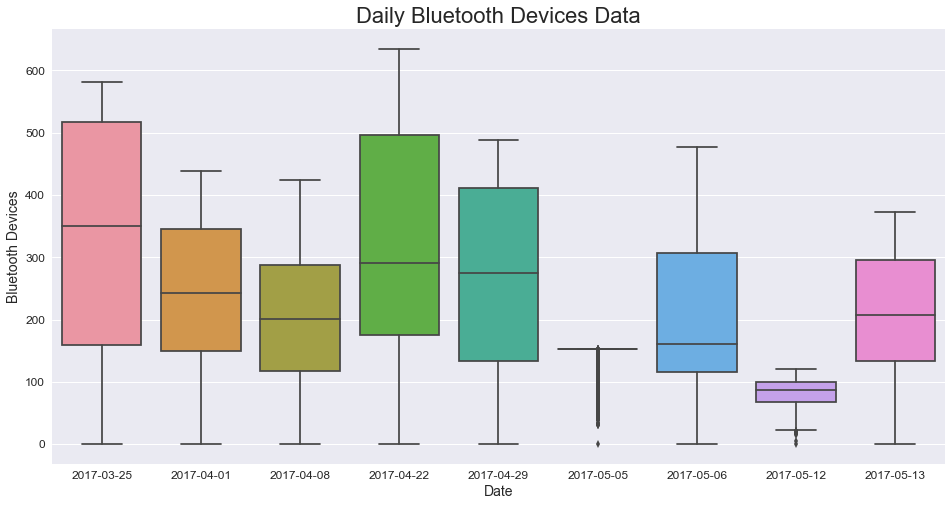

In [76]:
# Updated box-and-whiskers plots of daily bluetooth data
fig, ax = plt.subplots(figsize=(16,8))
sns.boxplot(x=bluetooth_period.index, y='bluetooth_devices', data=bluetooth_period, ax=ax)

ax.set_title('Daily Bluetooth Devices Data', fontsize=22)
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Bluetooth Devices', fontsize=14)
plt.tick_params(labelsize=12)

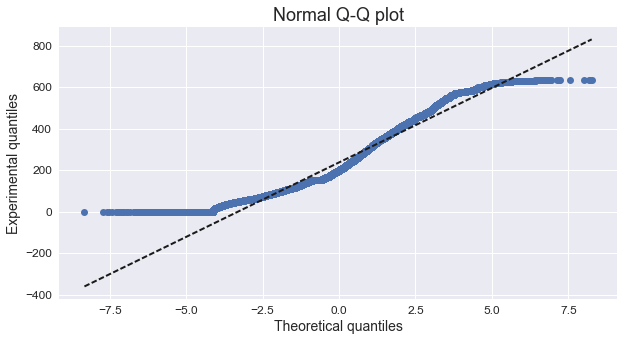

In [77]:
# Determine whether bluetooth data is normally distributed
bluetooth_distribution = bluetooth_data.values.flatten()
bluetooth_distribution.sort()

norm = np.random.normal(0,2,len(bluetooth_distribution))
norm.sort()

plt.figure(figsize=(10,5),facecolor='1.0') 
plt.plot(norm, bluetooth_distribution,'o')

# Generate a trend line
z = np.polyfit(norm, bluetooth_distribution, 1)
p = np.poly1d(z)
plt.plot(norm,p(norm),'k--', linewidth=2)
plt.title('Normal Q-Q plot', size=18)
plt.xlabel('Theoretical quantiles', size=14)
plt.ylabel('Experimental quantiles', size=14)
plt.tick_params(labelsize=12)

### Data Wrangling: Non-Personal Bluetooth Data

In [37]:
# Create non-personal bluetooth devices dataframe with DateTimeIndex
bluetooth_np_data = df[['bluetooth_non_personal_devices']].copy()

In [38]:
bluetooth_np_data.info()
bluetooth_np_data.describe()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 37989 entries, 2017-03-25 09:05:58 to 2017-05-13 16:13:20
Data columns (total 1 columns):
bluetooth_non_personal_devices    29900 non-null float64
dtypes: float64(1)
memory usage: 593.6 KB


,bluetooth_non_personal_devices
count,29900.000000
mean,210.063211
std,138.557441
min,0.000000
25%,104.000000
50%,168.000000
75%,308.000000
max,610.000000


C:\Users\kautu\Anaconda3\lib\site-packages\numpy\lib\function_base.py:583: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
C:\Users\kautu\Anaconda3\lib\site-packages\numpy\lib\function_base.py:584: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


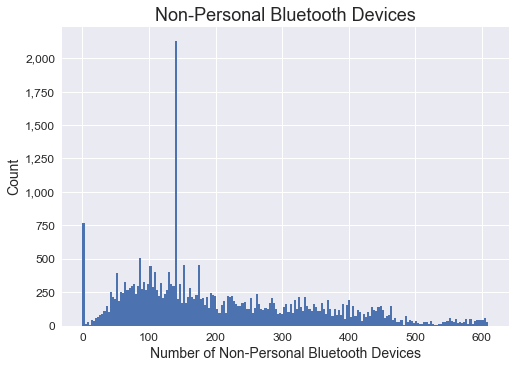

In [39]:
# Histogram of non-personal bluetooth data
n_data = len(bluetooth_np_data.bluetooth_non_personal_devices)
n_bins = np.sqrt(n_data)
n_bins = int(n_bins)

fig = plt.figure()
ax = fig.add_subplot(111)

ax.hist(bluetooth_np_data['bluetooth_non_personal_devices'], bins=n_bins,
        range= (bluetooth_np_data['bluetooth_non_personal_devices'].min(),
                bluetooth_np_data['bluetooth_non_personal_devices'].max())
       )
plt.title('Non-Personal Bluetooth Devices', size=18)
plt.xlabel('Number of Non-Personal Bluetooth Devices', size=14)
plt.ylabel('Count', size=14)
plt.tick_params(labelsize=12)
ax.yaxis.set_major_formatter(tkr.FuncFormatter(lambda y,  p: format(int(y), ',')))

In [40]:
# Identify the number of 0 values
blue_np_max = bluetooth_np_data[bluetooth_np_data['bluetooth_non_personal_devices'] == 0]
blue_np_max['bluetooth_non_personal_devices'].count()

767

In [41]:
# Create bluetooth dataframe with a daily PeriodIndex
bluetooth_np_period = bluetooth_np_data.to_period(freq='D')
bluetooth_np_period.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 37989 entries, 2017-03-25 to 2017-05-13
Freq: D
Data columns (total 1 columns):
bluetooth_non_personal_devices    29900 non-null float64
dtypes: float64(1)
memory usage: 593.6 KB


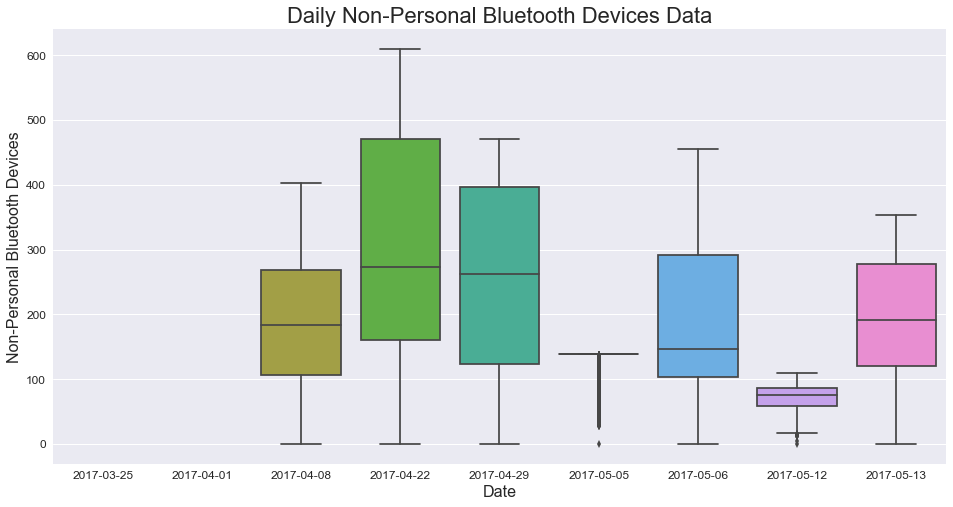

In [42]:
# Box-and-whiskers plots of daily non-personal bluetooth data
fig, ax = plt.subplots(figsize=(16,8))
sns.boxplot(x=bluetooth_np_period.index, y='bluetooth_non_personal_devices', data=bluetooth_np_period, ax=ax)

ax.set_title('Daily Non-Personal Bluetooth Devices Data', fontsize=22)
ax.set_xlabel('Date', fontsize=16)
ax.set_ylabel('Non-Personal Bluetooth Devices', fontsize=16)
plt.tick_params(labelsize=12)

In [43]:
# Slice bluetooth_devices and bluetooth_non_personal_devices columns into a new dataframe: bluetooth_combined
bluetooth_combined = df.loc['April 8, 2017', 'bluetooth_devices':'bluetooth_non_personal_devices']

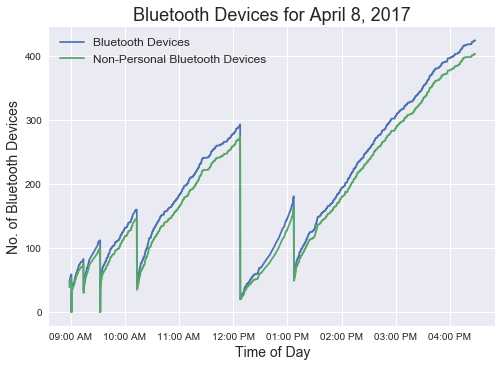

In [44]:
# Plot bluetooth devices and non-personal devices for April 8, 2017
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(bluetooth_combined)
plt.title('Bluetooth Devices for April 8, 2017', size=18)
plt.xlabel('Time of Day', fontsize=14)
ax.xaxis.set_major_formatter(md.DateFormatter('%I:%M %p'))
plt.ylabel('No. of Bluetooth Devices', fontsize=14)
plt.legend(('Bluetooth Devices', 'Non-Personal Bluetooth Devices'), loc='upper left', fontsize=12)

C:\Users\kautu\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


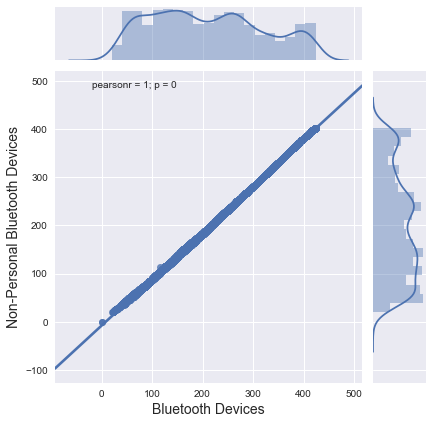

In [46]:
# Jointplot of bluetooth devices and non-personal bluetooth devices
sns.jointplot(x='bluetooth_devices', y='bluetooth_non_personal_devices',
              data=bluetooth_combined.dropna(), kind='reg')

plt.xlabel('Bluetooth Devices', fontsize=14)
plt.ylabel('Non-Personal Bluetooth Devices', fontsize=14)

## Concatenate Sensor Data
Concatenate temperature, humidity, CO&#8322;, light, noise, and bluetooth data into a new dateframe

In [47]:
# Concatenate cleaned sensor data in a new dataframe: sensor_all
# Backward fill missing data
sensor_data = pd.concat([temperature_data, humidity_data, co2_data, light_data,
                         noise_data, bluetooth_data], axis=1).fillna(method='bfill')

In [48]:
sensor_data.info()
sensor_data.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 37989 entries, 2017-03-25 09:05:58 to 2017-05-13 16:13:20
Data columns (total 6 columns):
temperature          37989 non-null float64
humidity             37989 non-null float64
co2                  37989 non-null float64
light                37989 non-null float64
noise                37989 non-null float64
bluetooth_devices    37989 non-null int64
dtypes: float64(5), int64(1)
memory usage: 2.0 MB


,temperature,humidity,co2,light,noise,bluetooth_devices
datetime,,,,,,
2017-03-25 09:05:58,22.6,36.9,781.0,430.0,511.0,1
2017-03-25 09:06:04,23.8,39.0,767.0,448.0,510.0,8
2017-03-25 09:06:10,23.8,39.0,754.0,423.0,511.0,8
2017-03-25 09:06:15,23.8,39.0,768.0,412.0,492.0,8
2017-03-25 09:06:21,23.8,39.0,758.0,428.0,491.0,9


In [89]:
sensor_data.describe()

,temperature,humidity,co2,light,noise,bluetooth_devices
count,37989.000000,37989.000000,37989.000000,37989.000000,37989.000000,37989.000000
mean,23.078162,39.646919,1193.532338,480.416700,315.193977,237.194451
std,1.431727,7.205353,159.242986,631.595488,177.548181,147.937111
min,20.700000,20.800000,629.000000,0.000000,0.000000,0.000000
25%,22.300000,37.500000,1083.000000,181.000000,144.000000,122.000000
50%,22.900000,39.700000,1230.000000,221.000000,216.000000,198.000000
75%,23.200000,45.600000,1301.000000,453.000000,502.000000,345.000000
max,29.400000,52.200000,2001.000000,4052.000000,1023.000000,635.000000


In [49]:
# Resample data by taking the mean per minute
sensor_data = sensor_data.resample('T').mean()

In [50]:
# Resample sensor data information
sensor_data.info()
sensor_data.describe()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 70989 entries, 2017-03-25 09:05:00 to 2017-05-13 16:13:00
Freq: T
Data columns (total 6 columns):
temperature          3426 non-null float64
humidity             3426 non-null float64
co2                  3426 non-null float64
light                3426 non-null float64
noise                3426 non-null float64
bluetooth_devices    3426 non-null float64
dtypes: float64(6)
memory usage: 3.8 MB


,temperature,humidity,co2,light,noise,bluetooth_devices
count,3426.000000,3426.000000,3426.000000,3426.000000,3426.000000,3426.000000
mean,23.134658,39.379503,1187.838504,467.853559,328.385249,241.489998
std,1.558891,7.171319,166.426025,571.665973,177.119239,149.857318
min,21.000000,21.190909,649.571429,143.000000,33.000000,0.000000
25%,22.200000,37.483333,1071.000000,183.187500,143.916667,123.600000
50%,22.866667,39.180000,1227.416667,222.625000,462.458333,205.750000
75%,23.191667,45.472917,1299.916667,442.738636,503.888889,352.272727
max,29.350000,50.730000,1724.200000,2891.583333,574.000000,635.000000


In [90]:
# Create a dataframe with a daily PeriodIndex
sensor_period = sensor_data.to_period(freq='D')
sensor_period.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 37989 entries, 2017-03-25 to 2017-05-13
Freq: D
Data columns (total 6 columns):
temperature          37989 non-null float64
humidity             37989 non-null float64
co2                  37989 non-null float64
light                37989 non-null float64
noise                37989 non-null float64
bluetooth_devices    37989 non-null int64
dtypes: float64(5), int64(1)
memory usage: 2.0 MB


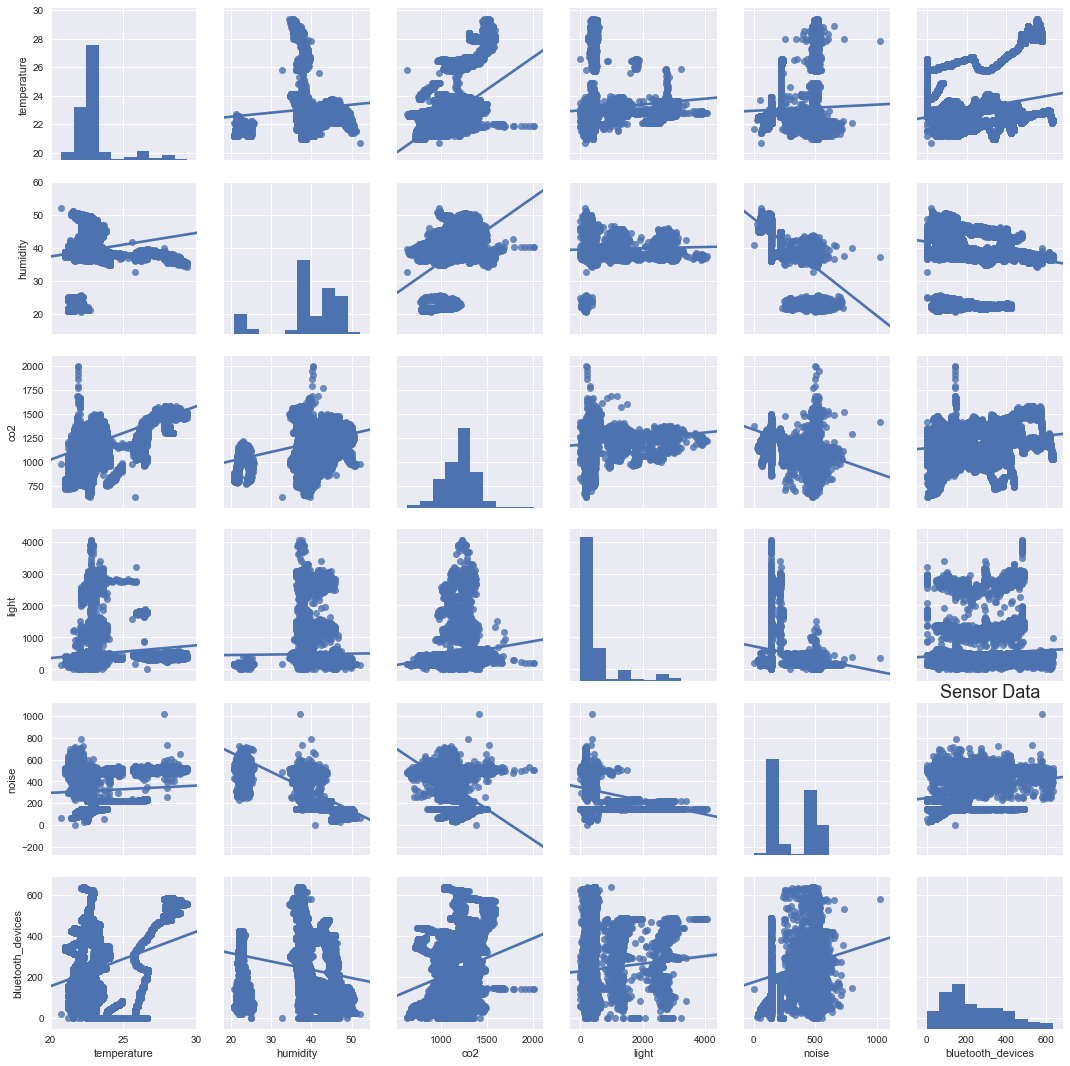

In [109]:
# Pairwise plots for all features
sns.pairplot(sensor_data, kind='reg')

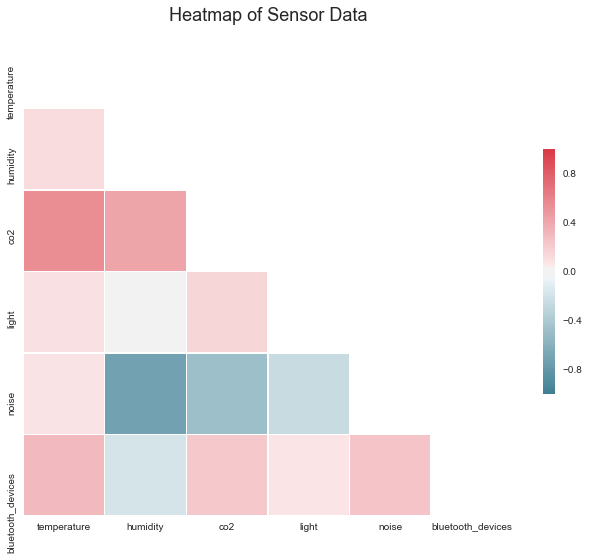

In [54]:
# Heatmap of feature variables
sns.set(style="white")

# Compute the correlation matrix
corr = sensor_data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

plt.title('Heatmap of Sensor Data', size=18)
#labels = ['Temp', 'Humidity', 'CO2', 'Light', 'Noise', 'Bluetooth']
#ax.set_xticklabels(labels)
#ax.set_yticklabels(labels)

C:\Users\kautu\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


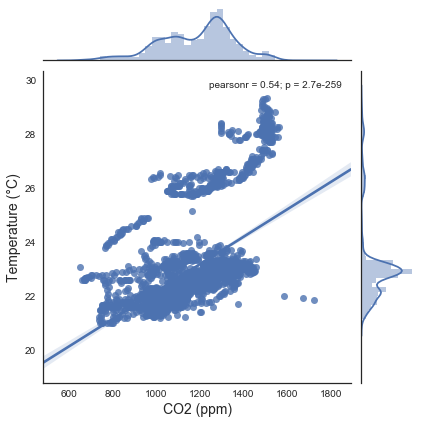

In [57]:
# Jointplot of CO2 and temperature data
sns.jointplot(x='co2', y='temperature', data=sensor_data, kind='reg')

plt.xlabel('CO2 (ppm)', fontsize=14)
plt.ylabel('Temperature (°C)', fontsize=14)

C:\Users\kautu\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


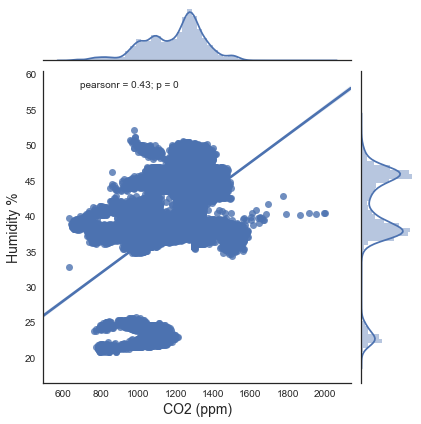

In [115]:
# Jointplot of CO2 and humidity data
sns.jointplot(x='co2', y='humidity', data=sensor_data, kind='reg')

plt.xlabel('CO2 (ppm)', fontsize=14)
plt.ylabel('Humidity %', fontsize=14)

In [ ]:
# Export updated sensor data to a CSV
sensor_data.to_csv('sensor_updated.csv')